In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from wordcloud import STOPWORDS

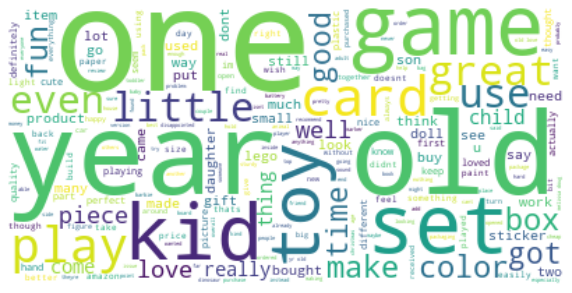

In [7]:
#Word Cloud of negative sentiment
df=pd.read_csv('train_data.csv')
reviews_sample = df
reviews_str = reviews_sample.review_content.str.cat() 
wordcloud = WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

# LDA Topic modelling

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
import spacy
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from spacy.lang.en import English
import lda

2022-04-07 01:52:50.879781: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /apps/python/v3.8.5/lib:/apps/openmpi-4.0.5/lib:/apps/aocl/aocc/2.2/lib:/apps/aocc-compiler-2.2.0/lib32:/apps/aocc-compiler-2.2.0/lib:/opt/rocm/lib
2022-04-07 01:52:50.879817: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [9]:
#Transforming sentences to vectors
df = pd.read_csv('sentence_split_train.csv',header=0)
df = df[df['sentence'].notna()] #drop na rows
nlp = English()
min_df = 3
max_features = 10000
vectorizer = CountVectorizer(min_df=min_df,max_features=max_features, ngram_range=(1,4))
X = vectorizer.fit_transform(df['sentence'])

In [10]:
#Identifying topics
n_topics = 2
n_iter = 2000

lda_model = lda.LDA(n_topics=n_topics, n_iter=n_iter, random_state=1)
X_topics = lda_model.fit_transform(X)

n_top_words = 10
topic_summaries = []
list_of_topics = []

topic_word = lda_model.topic_word_
vocab = vectorizer.get_feature_names()
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))
    print('Topic {} : {}'.format(i, ' '.join(topic_words)))
    list_of_topics = []

INFO:lda:n_documents: 139008
INFO:lda:vocab_size: 10000
INFO:lda:n_words: 1052256
INFO:lda:n_topics: 2
INFO:lda:n_iter: 2000
INFO:lda:<0> log likelihood: -9284669
INFO:lda:<10> log likelihood: -8501777
INFO:lda:<20> log likelihood: -8408976
INFO:lda:<30> log likelihood: -8320144
INFO:lda:<40> log likelihood: -8261501
INFO:lda:<50> log likelihood: -8240078
INFO:lda:<60> log likelihood: -8230473
INFO:lda:<70> log likelihood: -8226482
INFO:lda:<80> log likelihood: -8224338
INFO:lda:<90> log likelihood: -8222848
INFO:lda:<100> log likelihood: -8223191
INFO:lda:<110> log likelihood: -8221493
INFO:lda:<120> log likelihood: -8221586
INFO:lda:<130> log likelihood: -8221178
INFO:lda:<140> log likelihood: -8219896
INFO:lda:<150> log likelihood: -8220394
INFO:lda:<160> log likelihood: -8219951
INFO:lda:<170> log likelihood: -8220888
INFO:lda:<180> log likelihood: -8221107
INFO:lda:<190> log likelihood: -8220116
INFO:lda:<200> log likelihood: -8220444
INFO:lda:<210> log likelihood: -8220039
INFO:l

INFO:lda:<1990> log likelihood: -8218728
INFO:lda:<1999> log likelihood: -8218326


Topic 0 : one like get box card would little color good well
Topic 1 : love game old year year old fun play great gift kid


In [23]:
#Grouping sentences to topics 
doc_topic = lda_model.doc_topic_
sentence = []
topic = []
ndf = df['sentence'].reset_index(drop=True)
for i in range(len(ndf)):
    sentence.append(ndf[i])
    topic.append(doc_topic[i].argmax())
    
new_df = pd.DataFrame(sentence, columns=['sentence'])
new_df['topic'] = topic
print(new_df)

                                                 sentence  topic
0       feel like received different product positive ...      0
1                                            disappointed      0
2        3 year old wont know difference quality expected      0
3       majority conspicuous seam running right torso ...      0
4       really wanted love instead im debating whether...      1
...                                                   ...    ...
139003                                learning always fun      1
139004                        gauge everyones sense humor      1
139005                                          good like      1
139006                                keep maturity level      1
139007  remember read one rated complaining family fri...      1

[139008 rows x 2 columns]
